In [1]:
pip install nltk spacy pandas scikit-learn textblob wordcloud


   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.8 MB 991.0 kB/s eta 0:00:12
   ---------------------------------------- 0.1/11.8 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.8 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.8 MB 1.3 MB/s eta 0:00:10
    --------------------------------------- 0.3/11.8 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.3/11.8 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.4/11.8 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.5/11.8 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.8 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.6/11.8 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/11.8 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.7/11.8 MB 1.3 MB/s eta 0:00:09
   -

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from textblob import TextBlob

In [3]:
with open('shakespeare.txt', 'r', encoding='utf-8') as file:
    texte = file.read()

In [5]:
lines = texte.split()
# Display the first 10 lines
for line in lines[:10]:
    print(line)

From
fairest
creatures
we
desire
increase,
That
thereby
beauty's
rose


In [7]:
len(texte.split())

899588

In [9]:
import re
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords')

# Define custom stopwords to remove
stopwords = set(stopwords.words('english')).union({"thou", "thy", "shall", "thee"})

def nettoyer_texte(texte):
    # Convert text to lowercase
    texte = texte.lower()
    # Remove digits
    texte = re.sub(r'\d+', '', texte)
    # Remove special characters (non-word characters)
    texte = re.sub(r'\W+', ' ', texte)
    # Filter out stopwords (common words) and custom stopwords
    texte = ' '.join([mot for mot in texte.split() if mot not in stopwords]) 
    return texte

# Assuming 'texte' contains your original text
texte_nettoye = nettoyer_texte(texte)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [13]:
len(texte_nettoye.split())

463848

In [15]:
lines = texte_nettoye.split()
# Display the first 10 lines
for line in lines[:10]:
    print(line)

fairest
creatures
desire
increase
thereby
beauty
rose
might
never
die


In [17]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([texte_nettoye])
word_counts =pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).T.sort_values(0, ascending=False)
word_counts

,0
lord,3094
king,3041
good,2834
sir,2764
come,2519
...,...
florentius,1
religions,1
flora,1
relinquish,1


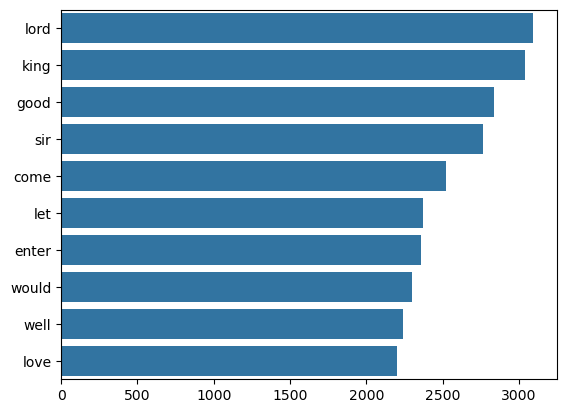

In [19]:
from collections import Counter
import seaborn as sns

mots = texte_nettoye.split()
frequence = Counter(mots).most_common(10)
mots, count = zip(*frequence)
sns.barplot(x=count, y=mots)
plt.show()

In [167]:
unique_word_count = len(vectorizer.get_feature_names_out())

print("Number of unique words:", unique_word_count)

Number of unique words: 23375


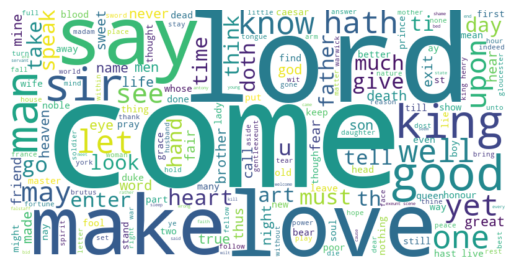

In [169]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_nettoye)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

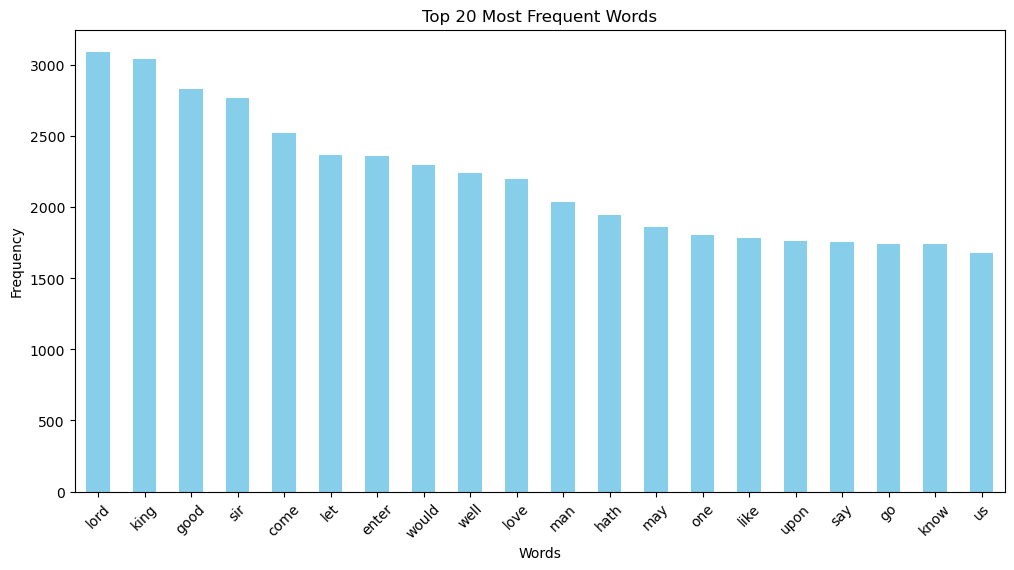

In [179]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

# Extract word counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([texte_nettoye])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Get the top 15 words
top_words = word_counts.sum().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigram = bigram_vectorizer.fit_transform([texte_nettoye])

# Créer le DataFrame
bigram_counts = pd.DataFrame(X_bigram.toarray(), columns=bigram_vectorizer.get_feature_names_out())

# Trier les bigrammes par fréquence décroissante
bigram_freq = bigram_counts.T  # Transpose le DataFrame pour avoir les bigrammes en lignes
bigram_freq.columns = ['count']
bigram_freq = bigram_freq.sort_values(by='count', ascending=False)

# Afficher les bigrammes les plus fréquents
print(bigram_freq.head(10))

                     count
king henry             403
exeunt scene           341
king richard           279
let us                 260
william shakespeare    254
good lord              240
ne er                  218
project gutenberg      217
copies may             217
etext illinois         217


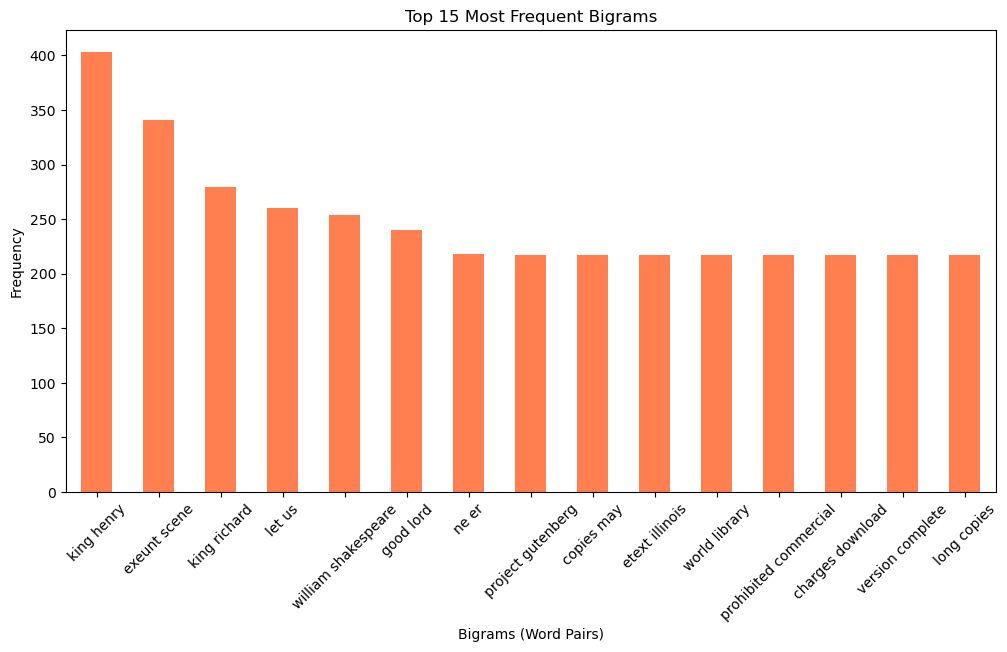

In [21]:

# Get the top 15 bigrams
top_bigrams = bigram_counts.sum().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
top_bigrams.plot(kind='bar', color='coral')
plt.title('Top 15 Most Frequent Bigrams')
plt.ylabel('Frequency')
plt.xlabel('Bigrams (Word Pairs)')
plt.xticks(rotation=45)
plt.show()


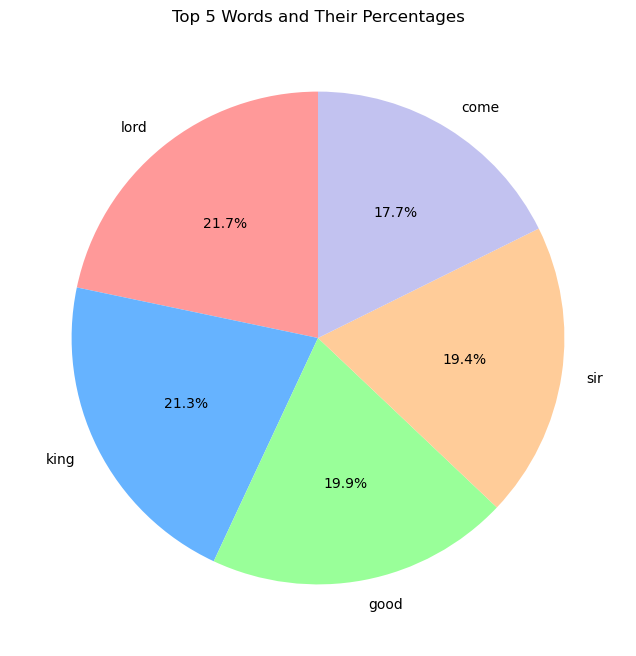

In [209]:
texte_nettoye = nettoyer_texte(texte)

# Split the cleaned text into words
words = texte_nettoye.split()

# Count the frequency of words
word_counts = Counter(words)

# Extract the top 5 most frequent words and their frequencies
top_5_words = word_counts.most_common(5)

# Prepare the labels and data for the pie chart
labels = [word for word, freq in top_5_words]
sizes = [freq for word, freq in top_5_words]
total_count = sum(sizes)  # Total count of words to calculate percentages
percentages = [(freq / total_count) * 100 for freq in sizes]  # Calculate percentage for each word

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

# Add a title
plt.title('Top 5 Words and Their Percentages')

# Show the plot
plt.show()

In [211]:
from textblob import TextBlob
sentiment = TextBlob(texte_nettoye).sentiment
print(sentiment) 

# Polarity (-1 = négatif, +1 = positif), Subjectivity (0 = objectif, 1 = subjectif)
# With 0.5289, the text is moderately subjective, meaning it contains a mix of opinions and facts.
# Since 0.1462 is slightly above zero, your text has a mildly positive tone.



Sentiment(polarity=0.14620529642682278, subjectivity=0.5289288557370305)


In [8]:
!pip install transformers
!pip install torch

In [17]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [26]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!jupyter notebook


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run script server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


^C


In [ ]:
from transformers import pipeline

# Charger le pipeline de résumé
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Lire le contenu du fichier
with open('shakespeare.txt', 'r', encoding='utf-8') as file:
    texte = file.read()

# Limiter à 1024 tokens max (car BART a une limite)
texte = texte[:300]

# Résumer le texte
resume = summarizer(texte, max_length=150, min_length=30, do_sample=False)

# Afficher le résumé
print("Résumé du texte :\n")
print(resume[0]['summary_text'])


model.safetensors:  15%|#4        | 241M/1.63G [00:00<?, ?B/s]